In [18]:
from IPython.display import display, Markdown, Latex

from analyse import deviation
from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

g=Graph(4800, 5200, 25)
p = Page(ticker=Ticker.CAC1PX, params='Class_type=0&Class_symbol=&Class_exchange=&ex=&ps=999&md=12-2018')
p.fetch()
(call, put) = p.scrap_options(multiplier=10)
var = deviation(close=5012.66, volatility=17.33, period=3, precision=0)
var = deviation(close=4963, volatility=18.58, period=3, precision=0)  # mercredi à l'ouverture
print('{}'.format(var))
sd = [var['1']['min'], var['1']['max']]
print('Variation : {}'.format(var['1']))
g.sdeviation = sd

{'1': {'min': 4862.0, 'max': 5064.0}, '2': {'min': 4761.0, 'max': 5165.0}, 'sd': 101.0}
Variation : {'min': 4862.0, 'max': 5064.0}


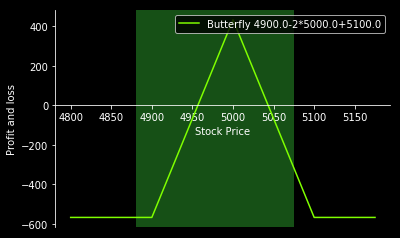

Cost-Butterfly : 567.00€


Category,strike,direction,Quantity,Cost,Premium
Call,4900,long,1,954,95.4
Call,5000,short,2,-408,-20.4
Call,5100,long,1,21,2.1


In [13]:
butterfly = Butterfly(call[4900], call[5000], call[5100])
g.profit_strategy(butterfly)
print('Cost-Butterfly : {:0.02f}€'.format(butterfly.cost()))
g.display_summary(butterfly)

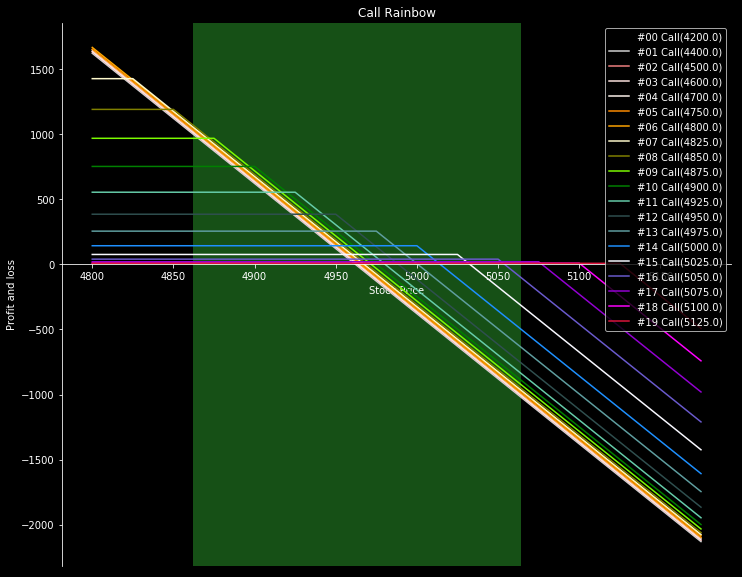

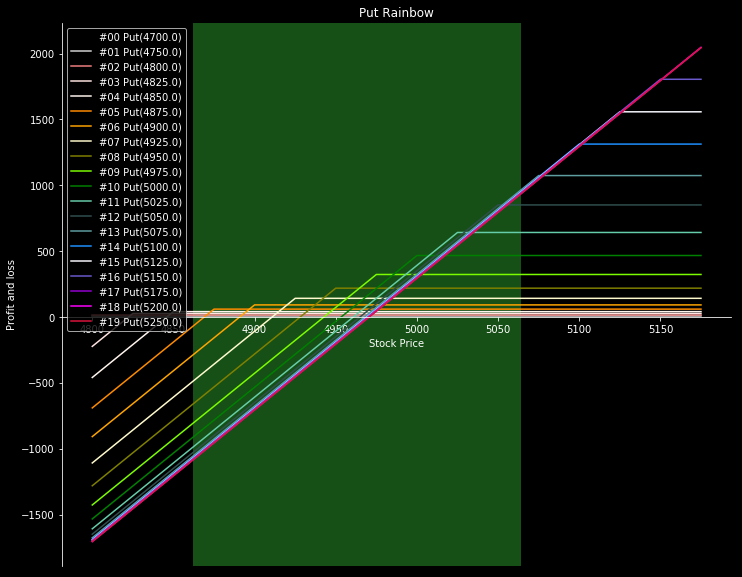

In [19]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')
g.profit_rainbow(put.values(), 'short', title='Put Rainbow')

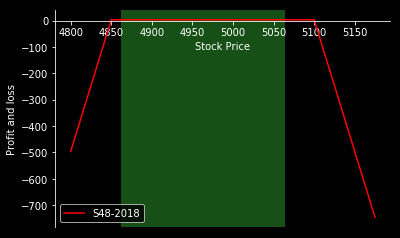

Category,strike,direction,Quantity,Cost,Premium
Call,4850,short,1,-1190,-119
Put,5100,short,1,-1313,-131.3


pv-max: 3.0000000000001137 €


In [22]:
s = Strategy('S48-2018').add(call[4850], 'short', 1).add(put[5100], 'short', 1)
g.profit(s, 'long')
g.display_summary(s)
print('pv-max: {} €'.format(max(s.payoff(g.sT, 'long'))))

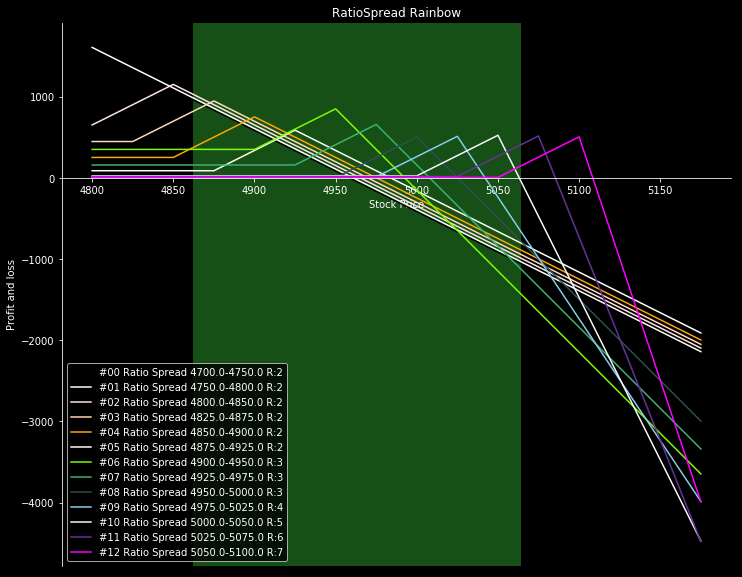

In [23]:
rss = RatioSpread.explorator(call.values(), step=50)
g.profit_rainbow(rss, 'long', title='RatioSpread Rainbow')

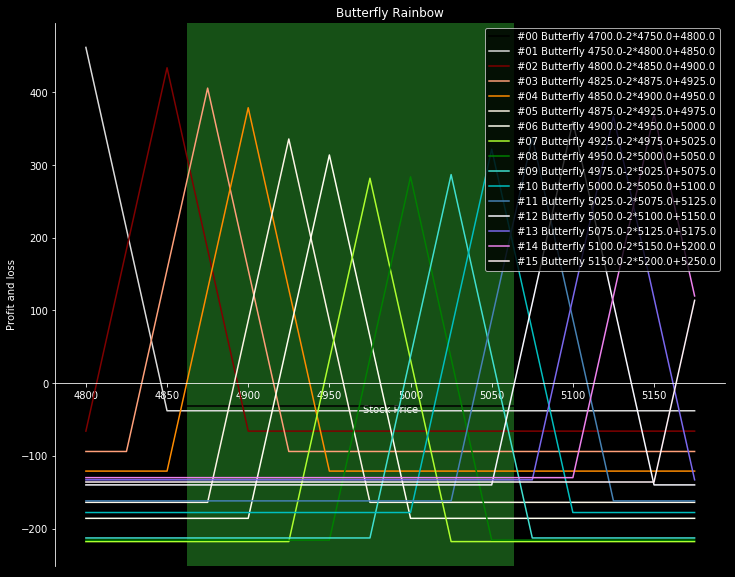

In [24]:
bfs = Butterfly.explorator(put.values(), step=50)
g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')

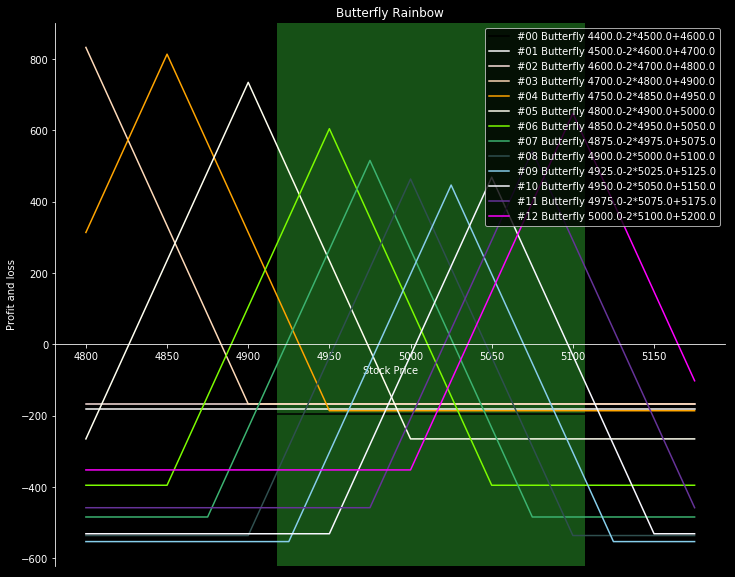

In [6]:
bfs = Butterfly.explorator(call.values(), step=100)
g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')

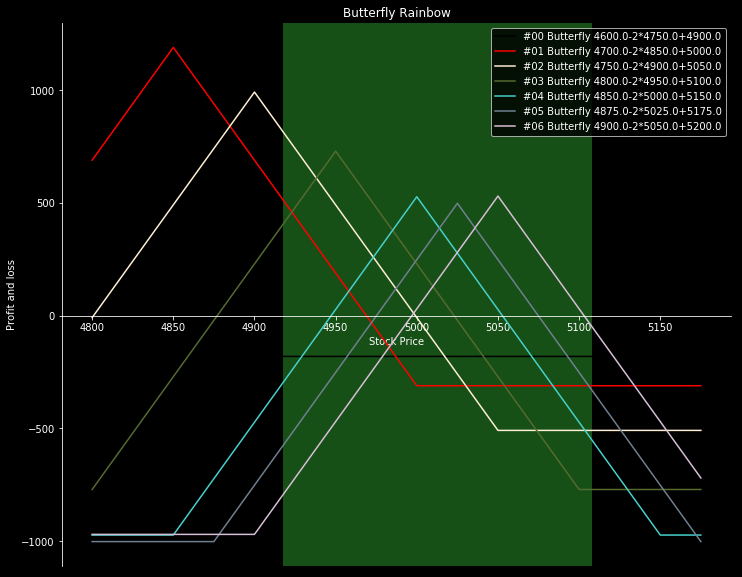

In [7]:
bfs = Butterfly.explorator(call.values(), step=150)
g.profit_rainbow(bfs, 'long', title='Butterfly Rainbow')